In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("immovlan_cleaned_file.csv", encoding="utf-8-sig")

# House-type 
house_types = [
    "Residence", "Villa", "Mixed Building", "Master House",
    "Cottage", "Bungalow", "Chalet", "Mansion"
]

df['type'] = df['type'].astype(str).str.strip().str.title()

# Sadece house-type kayıtlarını seç ve df1 olarak kaydet
df1 = df[df['type'].isin(house_types)].copy()

# Kontrol
print(f"House-type dataset created with {len(df1)} rows.")
print(df1['type'].value_counts())
df1.head(10)



House-type dataset created with 6088 rows.
type
Residence         5211
Villa              450
Mixed Building     196
Chalet              68
Master House        62
Cottage             50
Bungalow            45
Mansion              6
Name: count, dtype: int64


,url,Property ID,Price,State of the property,Availability,Number of bedrooms,Livable surface,Furnished,Attic,Garage,...,Surface terrace,Total land surface,Swimming pool,type,postal_code,city,Region,province,price_per_sqm,Price_per_sqm_land
2,https://immovlan.be/en/detail/residence/for-sa...,vbd46297,399000.0,NaN,NaN,2.0,129.0,NaN,NaN,1.0,...,NaN,NaN,NaN,Residence,1501,buizingen,Flanders,Flemish Brabant,3093.023256,NaN
6,https://immovlan.be/en/detail/residence/for-sa...,vbd11776,190000.0,NaN,NaN,5.0,142.0,0.0,1.0,1.0,...,NaN,320.0,NaN,Residence,6830,bouillon,Wallonia,Luxembourg,1338.028169,593.750000
9,https://immovlan.be/en/detail/residence/for-sa...,rbu64988,327850.0,To be renovated,On contract,3.0,185.0,0.0,1.0,1.0,...,21.0,683.0,0.0,Residence,9810,nazareth,Flanders,East Flanders,1772.162162,480.014641
14,https://immovlan.be/en/detail/residence/for-sa...,vbc54869,365000.0,New,NaN,3.0,203.0,0.0,1.0,1.0,...,NaN,298.0,NaN,Residence,5001,belgrade,Wallonia,Namur,1798.029557,1224.832215
18,https://immovlan.be/en/detail/residence/for-sa...,rbu61502,460000.0,NaN,NaN,4.0,178.0,NaN,NaN,NaN,...,NaN,NaN,NaN,Residence,9420,erpe-mere,Flanders,East Flanders,2584.269663,NaN
19,https://immovlan.be/en/detail/residence/for-sa...,vbd11793,145000.0,To be renovated,Immediately,3.0,270.0,0.0,1.0,NaN,...,NaN,NaN,NaN,Residence,6830,bouillon,Wallonia,Luxembourg,537.037037,NaN
20,https://immovlan.be/en/detail/residence/for-sa...,rbu66306,125000.0,To be renovated,On contract,1.0,80.0,0.0,0.0,NaN,...,NaN,168.0,0.0,Residence,9450,denderhoutem,Flanders,East Flanders,1562.500000,744.047619
22,https://immovlan.be/en/detail/residence/for-sa...,vbd16229,310000.0,To be renovated,NaN,3.0,146.0,0.0,1.0,1.0,...,NaN,267.0,NaN,Residence,6700,arlon,Wallonia,Luxembourg,2123.287671,1161.048689
28,https://immovlan.be/en/detail/residence/for-sa...,rbu65967,449000.0,NaN,On contract,3.0,359.0,NaN,NaN,1.0,...,NaN,6932.0,NaN,Residence,3530,houthalen-helchteren,Flanders,Limburg,1250.696379,64.772072
30,https://immovlan.be/en/detail/villa/for-sale/6...,vbd38998,797000.0,Excellent,On contract,5.0,350.0,0.0,NaN,1.0,...,130.0,6145.0,1.0,Villa,6470,sivry-rance,Wallonia,Hainaut,2277.142857,129.698942


In [2]:
df1.shape

(6088, 33)

In [3]:
df1.columns

Index(['url', 'Property ID', 'Price', 'State of the property', 'Availability',
       'Number of bedrooms', 'Livable surface', 'Furnished', 'Attic', 'Garage',
       'Number of garages', 'Kitchen equipment', 'Kitchen type',
       'Number of bathrooms', 'Number of showers', 'Number of toilets',
       'Type of heating', 'Type of glazing', 'Elevator', 'Number of facades',
       'Garden', 'Surface garden', 'Terrace', 'Surface terrace',
       'Total land surface', 'Swimming pool', 'type', 'postal_code', 'city',
       'Region', 'province', 'price_per_sqm', 'Price_per_sqm_land'],
      dtype='object')

In [4]:
df2=df1.drop(['url','Availability','Attic','Kitchen equipment','Kitchen type','Furnished'],axis="columns")
df2.head()



,Property ID,Price,State of the property,Number of bedrooms,Livable surface,Garage,Number of garages,Number of bathrooms,Number of showers,Number of toilets,...,Surface terrace,Total land surface,Swimming pool,type,postal_code,city,Region,province,price_per_sqm,Price_per_sqm_land
2,vbd46297,399000.0,NaN,2.0,129.0,1.0,NaN,1.0,1.0,1.0,...,NaN,NaN,NaN,Residence,1501,buizingen,Flanders,Flemish Brabant,3093.023256,NaN
6,vbd11776,190000.0,NaN,5.0,142.0,1.0,1.0,NaN,1.0,3.0,...,NaN,320.0,NaN,Residence,6830,bouillon,Wallonia,Luxembourg,1338.028169,593.750000
9,rbu64988,327850.0,To be renovated,3.0,185.0,1.0,1.0,1.0,1.0,2.0,...,21.0,683.0,0.0,Residence,9810,nazareth,Flanders,East Flanders,1772.162162,480.014641
14,vbc54869,365000.0,New,3.0,203.0,1.0,1.0,NaN,1.0,2.0,...,NaN,298.0,NaN,Residence,5001,belgrade,Wallonia,Namur,1798.029557,1224.832215
18,rbu61502,460000.0,NaN,4.0,178.0,NaN,NaN,1.0,NaN,2.0,...,NaN,NaN,NaN,Residence,9420,erpe-mere,Flanders,East Flanders,2584.269663,NaN


In [5]:
df2.shape

(6088, 27)

In [6]:
df2.isnull().sum()

Property ID                 0
Price                     136
State of the property    1445
Number of bedrooms         63
Livable surface           369
Garage                   2501
Number of garages        3622
Number of bathrooms       611
Number of showers        4439
Number of toilets        1840
Type of heating          1643
Type of glazing          3148
Elevator                 1895
Number of facades         986
Garden                    204
Surface garden           4010
Terrace                   390
Surface terrace          4180
Total land surface        939
Swimming pool            4334
type                        0
postal_code                 0
city                        0
Region                      0
province                    0
price_per_sqm             494
Price_per_sqm_land       1053
dtype: int64

In [7]:
import numpy as np

# "nan" olan stringleri gerçek NaN'e çevir
df2["Price"] = df2["Price"].replace("nan", np.nan)

In [8]:
df3=df2.dropna(subset=["Price"])

##Numerical coloumns filled with median less effected by outliers

In [9]:
df4 = df3.copy()


num_cols = [
    "Number of bedrooms","Livable surface","Number of bathrooms","Number of toilets",
    "Number of facades","Surface garden","Surface terrace","Total land surface",
    "Number of garages","Number of showers"
]

for col in num_cols:
    df4[col] = pd.to_numeric(df4[col], errors="coerce")
    df4[col] = df4[col].fillna(df4[col].median())


##Binary coloumn converted 0 and 1

In [10]:
df5 = df4.copy()
binary_cols = ["Garage", "Garden", "Terrace", "Elevator", "Swimming pool"]

for col in binary_cols:
    df5[col] = df5[col].fillna(0)
    df5[col] = df5[col].apply(lambda x: 1 if x != 0 else 0)
df5[binary_cols].head()


,Garage,Garden,Terrace,Elevator,Swimming pool
2,1,1,0,0,0
6,1,1,1,0,0
9,1,1,1,0,0
14,1,1,1,0,0
18,0,1,0,0,0


In [11]:

print(df5['Garage'].isna().sum())

# 2. check all binary col
binary_cols = ["Garage", "Garden", "Terrace", "Elevator", "Swimming pool"]
print(df5[binary_cols].isna().sum())

print(df5[df5['Garage'].isna()])


0
Garage           0
Garden           0
Terrace          0
Elevator         0
Swimming pool    0
dtype: int64
Empty DataFrame
Columns: [Property ID, Price, State of the property, Number of bedrooms, Livable surface, Garage, Number of garages, Number of bathrooms, Number of showers, Number of toilets, Type of heating, Type of glazing, Elevator, Number of facades, Garden, Surface garden, Terrace, Surface terrace, Total land surface, Swimming pool, type, postal_code, city, Region, province, price_per_sqm, Price_per_sqm_land]
Index: []

[0 rows x 27 columns]


##OUTLIERS REMOVAL

In [12]:
df5['Price'].describe()


count    5.952000e+03
mean     4.281538e+05
std      3.225572e+05
min      5.000000e+03
25%      2.650000e+05
50%      3.698880e+05
75%      4.947192e+05
max      8.600002e+06
Name: Price, dtype: float64

Items with outliers

OUTLIER REMOVAL - BOXPLOT BEFORE/AFTER

In [ ]:


# ---- 1) Custom Outlier Thresholds ----

outlier_rules = {
    "Number of garages": {"min": 0, "max": 50},
    "Number of showers": {"min": 0, "max": 50},
    "Number of bedrooms": {"min": 1, "max": 50}
}
# ---- 2) BEFORE = df5 ----
df_before = df5.copy()

# ---- 3) Temizleme Fonksiyonu ----
def remove_outliers(df, rules):
    df_clean = df.copy()
    for col, limits in rules.items():
        if "min" in limits:
            df_clean = df_clean[df_clean[col] >= limits["min"]]
        if "max" in limits:
            df_clean = df_clean[df_clean[col] <= limits["max"]]
    return df_clean

# ---- 4) OUTLIER CLEANING → df6 ----
df6 = remove_outliers(df5, outlier_rules)

print("Before:", len(df5))
print("After :", len(df6))
print("Removed:", len(df5) - len(df6))

# ---- 5) BEFORE vs AFTER BOX PLOTS ----
for col in outlier_rules.keys():
    plt.figure(figsize=(9,4))
    plt.boxplot(
        [df_before[col], df6[col]],
        labels=["Before", "After"],
        vert=False
    )
    plt.title(f"{col} – Before vs After Outlier Removal")
    plt.xlabel(col)
    plt.show()


In [14]:
df7 = df6.copy()

Outlier removal

In [31]:
import numpy as np
import pandas as pd

numeric_cols = [
    "Price", "Livable surface", "Total land surface", "Number of bedrooms",
    "Number of garages", "Surface terrace", "Surface garden",
    "Number of bathrooms", "Number of toilets", "Number of showers"
]

# 3-sigma extreme flag
def is_sigma_extreme(row):
    for col in numeric_cols:
        if col in df7.columns:
            mu = df7[col].mean()
            sigma = df7[col].std()
            if row[col] < mu - 3*sigma or row[col] > mu + 3*sigma:
                return True
    return False

df7["is_extreme_sigma"] = df7.apply(is_sigma_extreme, axis=1)

df_extreme = df7[df7["is_extreme_sigma"] == True].copy()
df_model = df7[df7["is_extreme_sigma"] == False].copy()

print("Normal houses (3-sigma):", len(df_model))
print("Extreme houses (3-sigma):", len(df_extreme))



Normal houses (3-sigma): 5636
Extreme houses (3-sigma): 304


In [16]:
df8 = df_model.copy() 

In [17]:
df8.shape

(5636, 28)

df7 BEFORE /df8 AFTER (removal of outliers based on 3 sigma rule)

In [18]:
import plotly.express as px

# Calculate median house price per province
province_median = df8.groupby("province", as_index=False)["Price"].median()
province_median = province_median.sort_values("Price", ascending=False)

# Plot with bright colors
fig_province = px.bar(
    province_median,
    x="province",
    y="Price",
    title="Median House Price by Province",
    labels={"Price": "Median Price (€)", "province": "Province"},
    color="Price",
    color_continuous_scale="Turbo",
)

fig_province.update_layout(
    xaxis_tickangle=45,
    height=600,
    template="plotly_white",
    showlegend=False,
)

fig_province.show(renderer="vscode")



In [19]:
df8.groupby("type")["type"].agg("count")

type
Bungalow            42
Chalet              64
Cottage             41
Mansion              2
Master House        49
Mixed Building     158
Residence         4896
Villa              384
Name: type, dtype: int64

In [ ]:
# Create Price per m² column in your main DataFrame
df8['Price_per_m2'] = df8['Price'] / df8['Livable surface']

# Check the first few rows
df8[['Price', 'Livable surface', 'Price_per_m2']].head(20)


Average Price per m² 

##impact of number of bedrooms on house price.

In [22]:
import plotly.express as px
import plotly.io as pio

# VS Code renderer (browser yerine)
pio.renderers.default = "vscode"

# Remove rows with missing Price or Number of Bedrooms
bedroom_df = df8.dropna(subset=["Price", "Number of bedrooms"])

# Convert Number of bedrooms to string for discrete coloring
bedroom_df["Number of bedrooms"] = bedroom_df["Number of bedrooms"].astype(int).astype(str)

# Calculate mean price per number of bedrooms for ordering
bedroom_order = (
    bedroom_df.groupby("Number of bedrooms")["Price"]
    .mean()
    .sort_values(ascending=False)
    .index.tolist()
)

# Box plot: Price distribution by Number of Bedrooms (sorted descending)
fig = px.box(
    bedroom_df,
    x="Number of bedrooms",
    y="Price",
    color="Number of bedrooms",
    title="Impact of Number of Bedrooms on House Price",
    labels={"Number of bedrooms": "Number of Bedrooms", "Price": "Price (€)"},
    points="all",
    category_orders={"Number of bedrooms": bedroom_order}
)

# Customize layout
fig.update_layout(
    xaxis=dict(type="category"),
    yaxis=dict(title="Price (€)"),
    showlegend=False,
    template="plotly_white",
    height=700,
    margin=dict(l=60, r=60, t=80, b=80)
)

# Show inside VS Code
fig.show(renderer="vscode")


##What is the correlation between the variables and the price

##group by the number of bedrooms and calculate the average house price per group

In [23]:
import pandas as pd
import plotly.express as px

# Clean DataFrame
bedroom_df = df8.dropna(subset=["Price", "Number of bedrooms"]).copy()
bedroom_df.loc[:, "Number of bedrooms"] = pd.to_numeric(bedroom_df["Number of bedrooms"], errors="coerce")
bedroom_df.loc[:, "Price"] = pd.to_numeric(bedroom_df["Price"], errors="coerce")

# Calculate correlation
correlation = bedroom_df["Number of bedrooms"].corr(bedroom_df["Price"]) 
print(f"Correlation between Number of Bedrooms and Price: {correlation:.4f}")

# Scatter plot
fig = px.scatter(
    bedroom_df,
    x="Number of bedrooms",
    y="Price",
    title="House Price vs. Number of Bedrooms",
    labels={"Number of bedrooms": "Number of Bedrooms", "Price": "Price (€)"})


Correlation between Number of Bedrooms and Price: 0.3993


What is the correlation between the variables and the price? Why do you think some variables are more correlated than others?

Variables like livable Surface, Number of bedrooms, or Number of bathrooms are often more correlated with Price because bigger/larger houses naturally cost more.

Features like Garage, Swimming Pool might show moderate correlation if they are present mostly in expensive houses.

Top 10 correlations with Price:
Livable surface        0.553564
Number of toilets      0.433172
Number of bathrooms    0.415315
Number of bedrooms     0.399341
Total land surface     0.299666
Swimming pool          0.258940
Garage                 0.233950
Terrace                0.184830
Garden                 0.168688
Number of showers      0.161378
Name: Price, dtype: float64


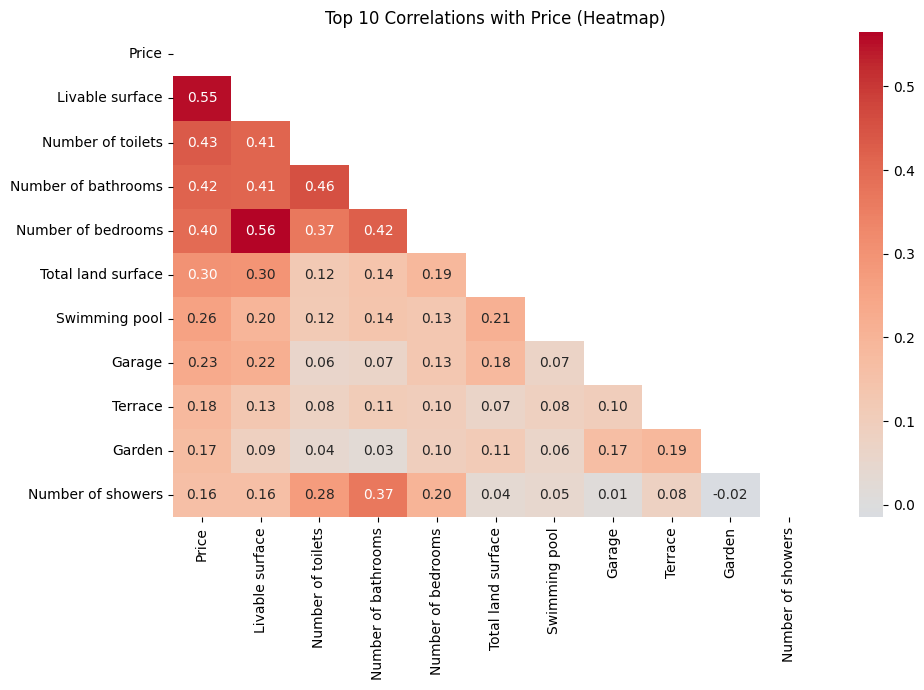

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- İstenmeyen kolonları çıkar ---
df8_clean = df8.drop(columns=[
    "postal_code", 
    "Number of facades", 
    "Number of garages",
    "Surface terrace",
    "Surface garden"
], errors="ignore")

# --- Sadece numerik kolonları seç ---
numeric_cols = df8_clean.select_dtypes(include='number').columns

# --- Korelasyon matrisi ---
corr_matrix = df8_clean[numeric_cols].corr()

# --- Price ile korelasyon (kendisi hariç) ---
price_corr = corr_matrix["Price"].drop("Price").sort_values(ascending=False)

# --- En yüksek 10 korelasyon ---
top10_features = price_corr.head(10).index.tolist()

# --- Bu kolonlar + Price için küçük bir korelasyon matrisi oluştur ---
top_corr_matrix = df8_clean[["Price"] + top10_features].corr()

print("Top 10 correlations with Price:")
print(price_corr.head(10))

# --- Upper triangle mask ---
mask = np.triu(np.ones_like(top_corr_matrix, dtype=bool))

# --- Heatmap çiz ---
plt.figure(figsize=(10, 7))
sns.heatmap(
    top_corr_matrix,
    annot=True,
    mask=mask,
    fmt=".2f",
    cmap="coolwarm",
    center=0
)
plt.title("Top 10 Correlations with Price (Heatmap)")
plt.tight_layout()
plt.show()


How are the variables themselves correlated to each other? Can you find groups of variables that are correlated together?
We can use the correlation matrix (already computed) and a cluster map to visualize clusters of correlated variables.

Which five variables do you consider the most important and why?

In [25]:
# --- Compute correlation of numeric variables ---
numeric_cols = df8.select_dtypes(include="number").columns
price_corr = df8[numeric_cols].corr()["Price"]

# --- Drop Price itself ---
price_corr = price_corr.drop("Price")

# --- Sort by absolute correlation and take top 10 ---
top10_vars = price_corr.abs().sort_values(ascending=False).head(10)

print("Top 10 numeric variables most correlated with Price:")
print(top10_vars)


Top 10 numeric variables most correlated with Price:
Livable surface        0.553564
Number of toilets      0.433172
Number of bathrooms    0.415315
Number of bedrooms     0.399341
Total land surface     0.299666
postal_code            0.262382
Number of facades      0.261142
Swimming pool          0.258940
Garage                 0.233950
Surface garden         0.211322
Name: Price, dtype: float64


In [26]:
df8.columns

Index(['Property ID', 'Price', 'State of the property', 'Number of bedrooms',
       'Livable surface', 'Garage', 'Number of garages', 'Number of bathrooms',
       'Number of showers', 'Number of toilets', 'Type of heating',
       'Type of glazing', 'Elevator', 'Number of facades', 'Garden',
       'Surface garden', 'Terrace', 'Surface terrace', 'Total land surface',
       'Swimming pool', 'type', 'postal_code', 'city', 'Region', 'province',
       'price_per_sqm', 'Price_per_sqm_land', 'is_extreme_sigma',
       'Price_per_m2'],
      dtype='object')

Which five variables do you consider the most important 

In [27]:
import plotly.express as px
import pandas as pd

# Select numeric columns
numeric_cols = df8.select_dtypes(include='number').columns

# Compute correlation matrix
corr_matrix = df8[numeric_cols].corr()

# Correlation of all variables with Price
price_corr = corr_matrix['Price'].drop('Price')  # exclude Price itself

# Top 10 variables by absolute correlation
top10 = price_corr.abs().sort_values(ascending=False).head(10)
top10_df = price_corr[top10.index].reset_index()
top10_df.columns = ['Variable', 'Correlation with Price']

# --- Exclude some variables ---
exclude_cols = ['Price_per_sqm_land', 'price_per_sqm', 'postal_code']  # example columns to exclude
top10_df = top10_df[~top10_df['Variable'].isin(exclude_cols)]

# Bar chart
fig = px.bar(
    top10_df,
    x='Variable',
    y='Correlation with Price',
    text='Correlation with Price',
    title='Top Variables Most Correlated with Price (Filtered)',
    labels={'Correlation with Price': 'Correlation with Price'},
    color='Correlation with Price',
    color_continuous_scale='Viridis'
)

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(template='plotly_white', yaxis=dict(range=[0, 1]), height=600)

fig.show()


Impact of Additional Features (Garage, Garden, Terrace, Elevator, Swimming Pool)

In [30]:
features = ["Garage", "Garden", "Terrace", "Swimming pool"]
feature_prices = []

for f in features:
    avg_yes = df8[df8[f] == 1]["Price"].mean()
    avg_no = df8[df8[f] == 0]["Price"].mean()
    feature_prices.append({"Feature": f, "Yes": avg_yes, "No": avg_no})

feature_df = pd.DataFrame(feature_prices)
feature_df_melt = feature_df.melt(id_vars="Feature", value_vars=["Yes","No"], var_name="Has Feature", value_name="Avg Price")

fig7 = px.bar(feature_df_melt, x="Feature", y="Avg Price", color="Has Feature", barmode="group", text="Avg Price",
              title="Impact of Features on House Price", labels={"Avg Price": "Average Price (€)"})
fig7.update_traces(texttemplate="€%{text:,.0f}", textposition="outside")
fig7.update_layout(template="plotly_white", height=500)
fig7.show()
